In [ ]:
!git clone https://github.com/stuniy/SPO_PGU.git

Cloning into 'SPO_PGU'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 83 (delta 3), reused 0 (delta 0), pack-reused 69
Unpacking objects: 100% (83/83), done.


# Визуализация в Python, библиотеки  `Matplotlib` и `Seaborn`
## Построение графиков в Python при помощи Matplotlib

Посредством зрения мы получаем огромный объем информации, мы привыкли смотреть на разные объекты и понимать, что это. Рисунки помогают нам понять, что происходит в целом, люди хорошо воспринимают графическую информацию и не очень хорошо - численную. Поэтому важно не только уметь проводить расчеты, но и представлять результаты этих расчетов в понятной форме. Это задача "визуализации". 

Визуализация данных — это большая часть работы специалистов в области data science. На ранних стадиях развития проекта часто необходимо выполнять разведочный анализ данных (РАД, Exploratory data analysis (EDA)), чтобы выявить закономерности, которые есть в данных. Визуализация данных помогает представить большие и сложные наборы данных в простом и наглядном виде. На этапе окончания проекта важно суметь отчитаться о его результатах так, чтобы даже непрофессионалам, не обладающим техническими знаниями, всё стало ясно и понятно.

Визуализация это отчасти и искусство, можно построить абсолютно точный, верный график, но такими цветами, в которых не разберешь, где одна линия, где другая. Поэтому всегда надо задумываться о том, а понятно ли то, что нарисовано. 

Но визуализация это и наука, здесь много математики которая позволяет понять, что происходит. Возможности визуализации ограничены, что экран компьютера, что листок бумаги это плоские, двумерные объекты, а как на нем изобразить трехмерную картину или стомерную (такое и не представишь в уме)? 

Для многих случаев хорошие способы визуализации уже подобраны и реализованы в специальных библиотеках. Мы изучим способы визуализации разных типов данных, а сегодня начнем с очень популярной библиотеки `Matplotlib`. 

[`Matplotlib`](https://matplotlib.org/) — это популярная библиотека для визуализации данных, написанная для языка Python. Хоть пользоваться ей очень просто, настройка данных, параметров, графиков и отрисовки для каждого нового проекта — занятие нудное и утомительное, но необходимое. 

На рисунке показаны разные типы графиков, которые есть в `matplotlib`, мы познакомимся с некоторыми из них.

![img](https://drive.google.com/uc?id=1ZdIyiMM4mDckWHC9V4cEf5JiD_WoFVii)

см. [статью](https://medium.com/nuances-of-programming/5-простых-способов-визуализации-данных-на-python-с-кодом-e0053808c83d) 

Подключим из библиотеки `matplotlib` инструменты для построения графиков из `.pyplot`. Также подключим `numpy`, которой будем создавать данные для визуализации, и установим np.random.seed() генератор псевдослучайных чисел в определенное значение, чтобы результаты от запуска к запуску не различались.

In [ ]:
import matplotlib.pyplot as plt # подключаем библиотеку

In [ ]:
import numpy as np #
np.random.seed(333) # генератор случайных чисел установим на произвольное, но определенное значение.

Графика представляется в виде совокупности связанных объектов, у которых множество разных свойств и методов, все их запоминать совершенно не нужно, ведь всегда можно посмотреть в документации. На рисунке показаны некоторые объекты, которые присутствуют на графиках. 

![img](https://drive.google.com/uc?id=1FND_wFlq1uIQ0IZtGqwtErlNs8-LBCOi)

Объект `Figure` (полотно) – это самый важный внешний контейнер для графики `matplotlib`.
`Figure` можно рассматривать как контейнер, содержащий один или несколько объектов `axes` (графиков), это полотно, на котором мы будем строить графики. Создается `Figure` с помощью команды [`figure()` ](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure),  которой мы можем указать такие параметры как размер полотна, цвета и др. Как альтернативу можно использовать команду `subplots()`.

`plt.subplots()` возвращает две переменные, вторая нам не нужна (поэтому используем прочерк), а первая – это созданный объект Figure. Создадим полотно, для него будут использованы параметры по умолчанию.

Следующим по важности и по иерархии графическим объектом является объект `axes`, которых может быть несколько на полотне, это собственно поле для построения графиков. Сейчас у нас он один, ради интереса посмотрим, какие у него есть поля ( с помощью `dir()`), их множество! Там есть и индивидуальные оси графика, и легенда графика и заголовок графика и прочие-прочие. 

In [ ]:
fig, _ = plt.subplots() # создадим полотно
print(type(fig)) # что это за тип?
dir(fig.axes[0]) # сколько у него разных свойств и методов.... 


 Практически каждый элемент можно читать, изменять и задавать явно.
 
 Например посмотрим на вертикальную ось OY (yaxis), у нее есть штрихи-деления, получим их get_major_ticks() и посмотрим на текст (метку label) второго (индекс 1) штришка-деления. Там указано число 0.2.  

In [ ]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[1].label # посмотрим на одно из свойств. Это ширишок-деление
print(one_tick) #


Text(0, 0.2, '0.2')


Запоминать все эти атрибуты бесполезно, нужны только основные из них, все остальное можно (нужно!) смотреть в документации.

## Stackplot
Давайте, наконец, построим какой-нибудь график.

Сначала создадим данные, которые хотим отобразить. Сделаем три случайных временных ряда.

Создадим полотно (fig) заданного размера `figsize`, содержащее один объект `Axes` (ax).

Построим на нем три этих ряда с помощью `ax.stackplot()`, указываем координаты точек строящихся рядов по горизонтальной и вертикальной осям, названия рядов (`labels=`).

С помощью `set_title()` укажем название нашего графика.

Отобразим легенду графика - название рядов и их отображение - с помощью `legend()` (укажем положение этой легенды на графике).

Установим область просмотра по горизонтальной оси с помощью `set_xlim()`

Установим название вертикальной оси с помощью `set_ylabel()`

`tight_layout()` применяется к объекту Figure в целом, чтобы графики располагались по-плотней, без пустых участков.

Наконец отобразим наше полотно `plt.show()`. 

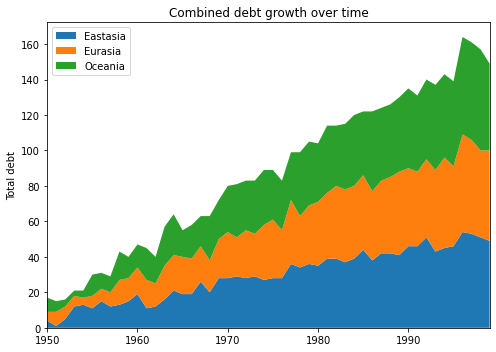

In [ ]:
import numpy as np #
import matplotlib.pyplot as plt #

# задаем данные
rng = np.arange(50) #
rnd = np.random.randint(0, 10, size=(3, rng.size)) #
yrs = 1950 + rng #
 
fig, ax = plt.subplots(figsize=(7, 5)) # создаем полотно заданного размера
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania']) # рисуем линии графиков, указав данные по оси х,оси у и названия графиков (метки)
ax.set_title('Combined debt growth over time') # название всего графика
ax.legend(loc='upper left') # отображаем подпись графиков, указывам его расположение
ax.set_ylabel('Total debt') # название оси ОУ
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1]) # диапазон отображения для оси ОХ
fig.tight_layout() # более компактное раположение элементов графиков
 
plt.show() # выводим на экран все полотна

## Несколько графиков на одном полотне. Scatter и hist
Давайте построим на одном полотне Figure два подграфика (Axes), описывающих два скоррелированных распределения , выводящихся из дискретного равномерного распределения.

Сначала, конечно, посчитаем данные, которые будем отображать, это некоторые числовые массивы.

Создадим полотно, но на нем укажем, что будем использовать две области для рисования. Используем ту же команду `plt.subplots()`, но теперь указываем ей, что нам нужно полотно на котором размечено 1 ряд и 2 столбца под графики (`nrows=1, ncols=2`). Команда вернет как сам объект полотна, так и объекты `axes` для обоих подграфиков (`ax1` и `ax2`). 

На первом подграфике строим scatter-график, дискретное распределение, `ax1.scatter()` указываем координаты точек по x и y осям,  тип маркера, которым точки будут отображаться, `marker='o'`, их цвет `c='r'`, цвет граней `edgecolor='b'`. Можно догадаться, что 'r' это красный,'b' - синий, а 'o' - кружочки. 

Устанавливаем названия для осей и подграфика в целом. В тексте можно использовать разметку [TeX](https://ru.wikipedia.org/wiki/LaTeX), чтобы писать сложный текст, формулы и т.п. Здесь текст внутри знака доллара $ будет выделен курсивом.

На втором подграфике строим гистограмму. Гистограмма показывает сколько элементов массива попали в заданный диапазон, значит мы должны указать какие диапазоны значений нас интересуют (`bins=...`). Гистограмма строится командой `hist()`, указываем ей данные, диапазоны, названия переменных. Здесь мы строим гистограммы сразу для двух переменных. 

Выведем для гистограммы легенду, чтобы понимать какой цвет какую переменную обозначает, установим название этого графика.

Чтобы лучше смотрелось, сделаем деления вертикальной оси не слева, как это по умолчанию происходит, а справа: `ax2.yaxis.tick_right()`

_Примечание: А вас не удивляет, что гистограмма названа как частоты (Frequencies)? Подумайте над этим, почему эти понятия схожи._

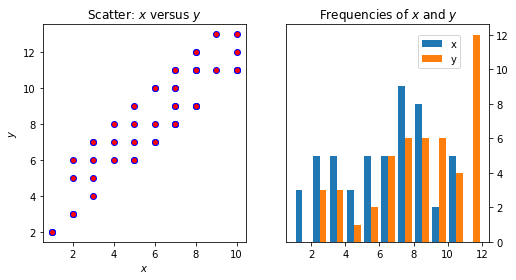

In [ ]:
import numpy as np #
import matplotlib.pyplot as plt # подключаем библиотеку
 
# задаем данные
x = np.random.randint(low=1, high=11, size=50) #
y = x + np.random.randint(1, 5, size=x.size) #
data = np.column_stack((x, y)) # преобразование из одномерных массивов в виде столбцов в двумерный массив
 
fig, (ax1, ax2) = plt.subplots( #делаем полотно с несколькими графиками
    nrows=1, ncols=2, # расположенными в один ряд два столбца
    figsize=(8, 4) # размер полотна
) #
 
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b') # строим первый график дискретного распределения
ax1.set_title('Scatter: $x$ versus $y$') # название первого графика
ax1.set_xlabel('$x$') # название горизонтальной оси первого графика, используем курсив
ax1.set_ylabel('$y$') # название вертикальной оси первого графика, используем курсив
 
ax2.hist( # строим второй график - гистограмму
    data, bins=np.arange(data.min(), data.max()), # задаем данные и диапазоны
    label=('x', 'y') # и подписи данных
)
 
ax2.legend(loc=(0.65, 0.8)) # отображаем легенду и задаем ее расположение
ax2.set_title('Frequencies of $x$ and $y$') # название второго графика
ax2.yaxis.tick_right() # устанавливаем, что вертикальная ось должна быть справа
 
plt.show() # отображаем полотна

## Загрузка и отображение данных 
Давайте загрузим и отобразим немного данных о макроэкономике недвижимости в Калифорнии, данные доступны по приведенному ниже адресу, хранятся в сжатом архиве tar (tgz). Используем команды из стандартных библиотек `io`, `tarfile`, и `urllib` чтобы загрузить и разархивировать эти данные. Библиотека `ssl` позволяет исправить проблемы с безопасностью Colab, просто выполним нужную команду.

`urlopen(url)` дает доступ к данным с указанного адреса url, создает объект, который мы можем читать методом `.read()` как-будто это файл. 

`tarfile.open()` открывает наш архив (аргумент `fileobj=`) на чтение (аргумент `mode='r'`), в нем данные хранятся в файлах текстового типа, значения разделены запятой `','`. 

Из архива извлечем нужный файл  CaliforniaHousing/cal_housing.data и прочитаем его командой `np.loadtxt()`, указав название файла и тип разделителя.

In [ ]:
import ssl # проблемы безопасности
# выполним, чтобы получить разрешение на загрузку
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
from io import BytesIO # для более удобной работы с данными как-будто они файлы
import tarfile # для работы с архивами
from urllib.request import urlopen # для доступа к данным по адресу
 
url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz' # адрес, где расположены наши данные
b = BytesIO(urlopen(url).read()) # читаем данные и  делаем интерфейс для более удобной работы с ними, как-будто они файлы
fpath = 'CaliforniaHousing/cal_housing.data' # путь и название нужного файла внутри архива 
 
with tarfile.open(mode='r', fileobj=b) as archive: # открываем загруженный архив на чтение
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',') # извлекаем нужный файл из него, читаем его как текстовый, указываем разделитель

In [ ]:
housing

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

В этих данных 9 столбцов, последний из них, который мы назовем `y`, показывает стоимость разной недвижимости в определенном районе Калифорнии. 5ый столбец описывает количество людей `pop`, проживающих в определенном районе, восьмой - средний возраст недвижимости `age`. Давайте извлечем эти значения. Чтобы за один раз извлечь данные в две переменные, столбцы нужно транспонировать в строки. Но, конечно, мы могли и по одному столбцу извлекать. 

In [ ]:
y = housing[:, -1] #последний столбец
pop, age = housing[:, [4, 7]].T # 5 и 8 столбцы в отдельные переменные (мы же помним, что индекс и номер отличаются на единичку)
#pop = housing[:, 4]
#age = housing[:, 7]

Мы будем строить три графика на одном полотне, чтобы одинаковые действия для каждого графика не делать вручную давайте определим вспомогательную функцию `add_titlebox()`, которая будет размещать заданный текст внутри графика, выполняющий роль названия графика:



In [ ]:
def add_titlebox(ax, text): # создаем свою вспомогательную функцию для заданного объекта графика и текста
    ax.text(.55, .8, text, # она распологает текстовое окно
        horizontalalignment='center', # с расположением текста по центру
        transform=ax.transAxes, # "оси" для текста
        bbox=dict(facecolor='white', alpha=0.6), # очерчивание текста прямоугольником
        fontsize=12.5) # размер шрифта
    return ax # возращаем измененный объект графика

Данные все загружены, давайте сделаем график. На одном полотне мы будем строить три графика, причем первый будет побольше, а два других - поменьше и расположены под первым.

Чтобы такое реализовать используем модуль `gridspec` библиотеки `matplotlib` и  функцию `subplot2grid()`, которая взаимодействует с этим модулем.

Условно наше полотно разбивается на заданное число клеток, сетку, пусть 3 ряда клеток по вертикали и 2 столбца по горизонтали. Для первого графика возьмем клетки из первых двух рядов по вертикали и все столбцы по горизонтали: начинаем с клетки (0,0), объединяем четыре клетки: две клетки по вертикали `rowspan=2` и две по горизонтали `colspan=2`. Это место для рисования первого графика. Остальные графики будут занимать по одной клетке. 

В `subplot2grid()` указываем какую сетку используем,  с какой клетки начинаем объединение и сколько клеток по горизонтали\вертикали объединяем. Если объединять не надо, т оэти аргументы можно опустить. 

Итак, первый график будет нарисован в клетках (0,0), (0,1), (1,0), (1,1).
Второй - в клетке (2,0), третий в клетке (2,1). 
(помним что индексы и номера отличаются на единичку).




Области рисования заданы, давайте установим остальные нужные свойства графиков.

Название для первого графика установим через `ax1.set_title()`, а для второго и третьего - через сделанную нами выше функцию `add_titlebox()`. Конечно, можно было бы и для них использовать `.set_title()`, но тогда бы название располагалось выше области рисования, а так оно будет внутри - сэкономим место, более компактный рисунок. 

Строим на первом графике уже известный нам scatter-график. Но теперь будем данные рисовать не одним заданным цветом, а сделаем так, чтобы цвет соответствовал значению данного. Для этого нужно во-первых указать, какие именно значения использовать для отрисовки цвета. Мы используем значения y (аргумент `c=y`).

Во вторых нужно указать как перевести эти значения в цвет, ведь цвет не может быть, например, отрицательным, а значения в данных могут. Надо установить шкалу для отображения значений в цвет. Такую шкалу называют цветовой картой (colormap). От выбора цветовой карты будет зависеть наглядность нашего рисунка. Есть уже много заранее сделанных [цветовых карт](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html), но можно сделать и свою. Мы используем цветовую карту под названием 'RdYlGn' (`cmap='RdYlGn'`), в которой цвет постепенно изменяется от красного в желтый и затем в зеленый при росте отображаемого значения.  
Функция `colorbar()` (применяется к Figure целиком, а не к Axes) отобразит выбранную нами цветовую карту в виде цветного столбика с подписанными значениями. Укажем откуда брать данные для отображения (объект `sctr` - результат `ax1.scatter()` ), на каком графике отображать (`ax=ax1` - на первом), формат подписей (` format = ' $ % d'` - целые числа со знаком доллара.)

Установим логарифмический масштаб для вертикальной оси первого графика (там большие числа).

На втором и третьем графике построим гистограммы возрастов и количества населения. Диапазоны пусть выбираются автоматически(`bins='auto'`), а для третьего графика будем строить в логарифмическом масштабе (`log=True`).

Визуально, разница в цветах незначительна (говоря о переменной у), так как мы рассматриваем ось у, указывающую на влияние возраста недвижимости на её стоимость.

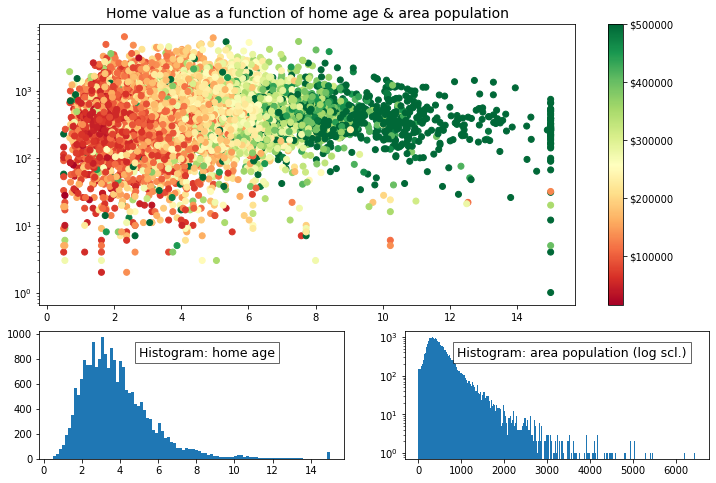

In [ ]:
import matplotlib.pyplot as plt #
 
gridsize = (3, 2) # размер сетки 
fig = plt.figure(figsize=(12, 8)) # создаем полотно
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # первый график будет занимать 4 клетки из сетки
ax2 = plt.subplot2grid(gridsize, (2, 0)) # а эти по одной
ax3 = plt.subplot2grid(gridsize, (2, 1)) #
ax1.set_title( # название первого графика
    'Home value as a function of home age & area population',
    fontsize=14 # размер шрифта
)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn') # строим дискретное распределение, зависимость стоимости от возраста и населенности, стоимость отображается цветом в заданной цветовой карте
plt.colorbar(sctr, ax=ax1, format='$%d') # отображаем цветовую карту со шкалой значений
ax1.set_yscale('log') # логарифмический масштаб

ax2.hist(age, bins='auto') # второй график - гисторамма возрастов
ax3.hist(pop, bins='auto', log=True) # третий график - гистограмма населенности, в логарифмическом масштабе
 
add_titlebox(ax2, 'Histogram: home age') # название второго графика
add_titlebox(ax3, 'Histogram: area population (log scl.)') # название третьего графика

plt.show() #

## Отображение матриц. `imshow` и `matshow`

Для наглядного отображения матриц, можно использовать команды `imshow()` и `matshow()`, причем последняя это просто вариант (обертка) первой. 

Давайте создадим две матрицы (создайте свои!).

In [ ]:
import numpy as np #
 
x = np.diag(np.arange(2, 12))[::-1] #
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12) #
x2 = np.arange(x.size).reshape(x.shape) #

In [ ]:
print(x,'\n\n',x2) #

[[ 2  0  0  0  0  0  0  0  0 11]
 [ 0  3  0  0  0  0  0  0 10  0]
 [ 0  0  4  0  0  0  0  9  0  0]
 [ 0  0  0  5  0  0  8  0  0  0]
 [ 0  0  0  0  6  7  0  0  0  0]
 [ 0  0  0  0  6  7  0  0  0  0]
 [ 0  0  0  5  0  0  8  0  0  0]
 [ 0  0  4  0  0  0  0  9  0  0]
 [ 0  3  0  0  0  0  0  0 10  0]
 [ 2  0  0  0  0  0  0  0  0 11]] 

 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


Давайте нарисуем эти матрицы: зададим полотно и подграфики и используем `.matshow()` чтобы цветом отобразить элементы матрицы.

Для первой матрицы подпишем значения ненулевых элементов, нулевые не выводим: `ax1.text(...)`. Обратите внимание, что в матрице первое измерение это строки, второе - столбцы (индекс [i,j]), а на графиках при выводе текста первое измерение это горизонтальная ось рисования, второе - вертикальная. Мы привыкли располагать строки по вертикали, а столбцы по горизонтали. Поэтому индекс для координат текста транспонирован [j,i].    `x.nonzero()` возвращает нам индексы (два индекса) ненулевых элементов массива в виде кортежа , оператор `*` распакует его в отдельные аргументы, а `zip()` позволит сделать итератор по этим парам индексов. 

Уберем все подписи и деления для осей рисования, чтобы не мешались: `.axis('off')`

Добавим цветовую ось, чтобы видеть какие цвета каким значениям соответствуют. `.colorbar()`. Чтобы эта цветовая ось была такой же по размеру, что и выводимая матрица, мы ее уменьшим `shrink=0.79`, а чтобы она располагалась поближе к матрице установим маленький зазор `pad=0.01` .

Для цвета мы будем использовать цветовую карту (палитру) ‘RdYlGn_r‘, где модификатор ‘_r’ говорит что палитра ‘RdYlGn‘ перевернута (т.е. зеленый - малые значения, красный - большие).




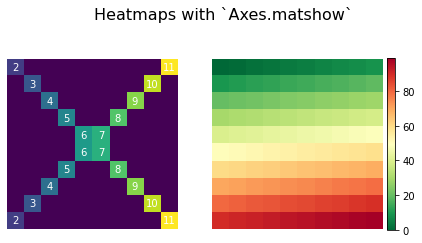

In [ ]:
import numpy as np #
import matplotlib.pyplot as plt #

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4)) #
ax1.matshow(x) #
ax1.axis('off')
img2 = ax2.matshow(x2, cmap='RdYlGn_r') #
ax2.axis('off')
 
for i, j in zip(*x.nonzero()): #
    ax1.text(j, i, x[i, j], color='white', ha='center', va='center') #
 
plt.colorbar(img2, ax=[ax1, ax2], shrink=0.79, pad=0.01)
fig.suptitle('Heatmaps with `Axes.matshow`', fontsize=16) #
 
plt.show() #

## Графики в `pandas`

Метод `plot()` в Series и DataFrame pandas – это обертка для `plt.plot()`. Удобство заключается в том, что если индекс DataFrame состоит из дат, gcf().autofmt_xdate() вызывается pandas изнутри для получения текущего объекта Figure и красивого форматирования оси х в автоматическом режиме. Это значит что графики из pandas совместимы с графиками matplotlib и все, что мы о них узнали можем применять и для pandas.

Помните о том, что `plt.plot()` (структурированный подход) неявно имеет представление о текущем объекте Figure и Axes, так что pandas следует структурированному подходу путем расширения.

<class 'matplotlib.axes._subplots.AxesSubplot'>
True


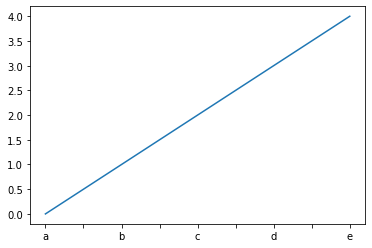

In [ ]:
import pandas as pd # подключим pandas 
 
s = pd.Series(np.arange(5), index=list('abcde')) # сделаем какую-нибудь последовательность Series 
ax = s.plot() # отобразим его. Это метод из pandas, а не из matplotlib
 
print(type(ax)) # Но тип его это <matplotlib.axes._subplots.AxesSubplot at 0x121083eb8> #
 
print(id(plt.gca()) == id(ax)) # Такой же как у графиков из matplotlib:  True 

## Домашнее задание

1. Загрузить выборку с сайта Kaggle.com.
2. Внимательно изучите документацию на matplotlib (https://matplotlib.org/3.1.1/index.html), узнайте про другие типы графиков, постройте некоторые из них, какие понравятся.

